In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<font size=10><b>Data Preprocessing - Assignment I</b></font> 

# Exercise:

In this exercise, we will look at listings of Airbnb in Amsterdam, trying to predict the `price` of each listing by it's characteristics

<div class="alert alert-info"><b>NOTE:</b> There is no Data dictionary available for this data, but the column names can help you understand or assume the meaning of the features</div>


## Part I:

 1. Download and extract the following file: [Airbnb Amsterdam Listings](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2019-05-06/data/listings.csv.gz)
 2. Take a subset using only the following columns: `['listing_url', 'name', 'summary', 'space', 'host_id', 'host_name', 'host_since', 'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']`
 3. Look at the data and define - which are your categorical features and which are your continuous features? Write a list of each.
 4. Split the data to train and test randomly (no need for a dev set at the moment).
 5. Perform EDA on the **train** dataset - print the summary statistics and contents of each column, plot the distributions of each feature, plot the relationship between all of the features, as well as on the relations of all of the features with the dependent variable. No need to add new features.
 6. Remove columns that are redundant / are not important / are duplicated / are correlated - explain why you selected the features that way.

### 1, 2 - Download airbnb dataset and take subset

In [3]:
df = pd.read_csv('listings.csv')
df= df[['listing_url', 'name', 'summary', 'space', 'host_id', 'host_name', 'host_since',
        'host_response_rate', 'host_identity_verified', 'city', 'state', 'country', 'latitude',
        'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms',
        'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'number_of_reviews',
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location', 'review_scores_value']]
df.head()

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_url,name,summary,space,host_id,host_name,host_since,host_response_rate,host_identity_verified,city,...,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,https://www.airbnb.com/rooms/2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,3159,Daniel,2008-09-24,100%,f,Amsterdam,...,NaN,$59.00,255,97.0,10.0,10.0,10.0,10.0,9.0,10.0
1,https://www.airbnb.com/rooms/20168,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,59484,Alexander,2009-12-02,100%,f,Amsterdam,...,NaN,$80.00,267,88.0,9.0,9.0,9.0,9.0,10.0,9.0
2,https://www.airbnb.com/rooms/25428,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...",56142,Joan,2009-11-20,100%,f,Amsterdam,...,NaN,$125.00,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3,https://www.airbnb.com/rooms/27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,97647,Flip,2010-03-23,100%,t,Amsterdam,...,NaN,$150.00,189,99.0,10.0,10.0,10.0,10.0,10.0,10.0
4,https://www.airbnb.com/rooms/28658,Cosy guest room near city centre -1,2 beds guest room in Amsterdam West near Erasm...,Cosy small but comfortable guest room with twi...,123414,Michele,2010-05-12,100%,t,Amsterdam,...,NaN,$65.00,453,93.0,10.0,10.0,10.0,10.0,9.0,9.0


In [4]:
df.columns

Index(['listing_url', 'name', 'summary', 'space', 'host_id', 'host_name',
       'host_since', 'host_response_rate', 'host_identity_verified', 'city',
       'state', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

### 3 - Split data into Categorical and Continuous

In [5]:
categoric_list = ['listing_url','name','summary','space','host_id','host_name','host_since','host_identity_verified',
                  'city','state','country',
                 'is_location_exact','room_type','bed_type','amenities','property_type']
continuous_list =['host_response_rate','latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price','number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value']

In [6]:
assert(len(categoric_list)+len(continuous_list)==len(df.columns))

After doing some research on the aribnb website and understanding their business model, I concluded that the appropriate dependant variable here is the price.

In [7]:
features =['listing_url', 'name', 'summary', 'space', 'host_id', 'host_name',
       'host_since', 'host_response_rate', 'host_identity_verified', 'city',
       'state', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']
target = 'price'

Before splitting the data I need to modify the values in the column 'host_response_rate'.

In [8]:
df['host_response_rate']=df['host_response_rate'].str.replace('%','')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

In [9]:
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
df['price']

0         59.0
1         80.0
2        125.0
3        150.0
4         65.0
5         75.0
6         55.0
7        219.0
8        145.0
9        180.0
10       159.0
11       210.0
12       100.0
13       200.0
14       150.0
15       140.0
16       350.0
17       240.0
18       125.0
19       115.0
20        90.0
21        87.0
22        75.0
23        60.0
24        86.0
25       222.0
26       250.0
27       159.0
28        60.0
29       149.0
         ...  
19589    150.0
19590    299.0
19591    115.0
19592    139.0
19593     90.0
19594    140.0
19595     97.0
19596     80.0
19597    120.0
19598    450.0
19599    200.0
19600     83.0
19601    400.0
19602    250.0
19603    150.0
19604    100.0
19605     70.0
19606    199.0
19607     90.0
19608    150.0
19609    180.0
19610     80.0
19611     95.0
19612     75.0
19613    300.0
19614    130.0
19615    200.0
19616    140.0
19617    150.0
19618    109.0
Name: price, Length: 19619, dtype: float64

### 4 - Random Split data into train and test set

In [10]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]

In [11]:
continuous_list.remove('price')
continuous_list

['host_response_rate',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, \
                                                    random_state=42)

#### Check validity of the split:

In [13]:
df.shape

(19619, 33)

In [14]:
X_train.shape, X_test.shape

((15695, 32), (3924, 32))

In [15]:
set(X_train.index) & set(X_test.index)

set()

### 5,6 - EDA and remove the redundant /not important / duplicated /correlated Columns

#### Summary statistics and analysis

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15695 entries, 12384 to 15795
Data columns (total 32 columns):
listing_url                    15695 non-null object
name                           15668 non-null object
summary                        15279 non-null object
space                          11502 non-null object
host_id                        15695 non-null int64
host_name                      15685 non-null object
host_since                     15685 non-null object
host_response_rate             9094 non-null float64
host_identity_verified         15685 non-null object
city                           15693 non-null object
state                          15535 non-null object
country                        15695 non-null object
latitude                       15695 non-null float64
longitude                      15695 non-null float64
is_location_exact              15695 non-null object
property_type                  15695 non-null object
room_type                      15695 n

In [17]:
X_train.shape

(15695, 32)

In [18]:
X_train.head()

,listing_url,name,summary,space,host_id,host_name,host_since,host_response_rate,host_identity_verified,city,...,amenities,square_feet,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
12384,https://www.airbnb.com/rooms/20053026,Cozy contemporary apartment in A'dam Nieuw-West,Modern light Room & Apartment with new kitchen...,It's modern with a little jungle surprise inside.,90289441,Dennelise,2016-08-16,100.0,f,Amsterdam,...,"{TV,Wifi,Kitchen,Washer,""Smoke detector"",Essen...",NaN,23,95.0,9.0,9.0,10.0,10.0,9.0,9.0
14872,https://www.airbnb.com/rooms/23847258,city centre dream house + private garden,Our Amsterdam dream house. For rent when we're...,160m2 high ceilings,2705184,Juul & Ruben,2012-06-21,80.0,t,Amsterdam,...,"{TV,Wifi,Kitchen,""Paid parking off premises"",H...",NaN,4,95.0,10.0,10.0,10.0,10.0,10.0,9.0
3245,https://www.airbnb.com/rooms/5944282,Great canal apartment in Jordaan!,Located in the old Jordaan neighborhood with p...,The apartment is the bottom apartment in an ap...,4813139,Manon,2013-01-23,NaN,t,Amsterdam,...,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",NaN,23,100.0,9.0,10.0,10.0,10.0,10.0,10.0
17907,https://www.airbnb.com/rooms/30434953,A big Amsterdam apartment near City Centre,Great location near Amsterdam Bijlmer Arena St...,To entre the apartment you can take the lift o...,8351278,Chad,2013-08-23,80.0,f,Amsterdam,...,"{TV,Kitchen,Elevator,Heating,Washer,""Smoke det...",NaN,4,90.0,10.0,9.0,10.0,10.0,9.0,10.0
18920,https://www.airbnb.com/rooms/33008872,"Luxury studio with 1 bedroom, suitable for fou...",Two single beds and one sofa bed are situated ...,NaN,246190166,Cityden,2019-03-01,36.0,f,Amsterdam,...,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
X_train.describe()

,host_id,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.569500e+04,9094.000000,15695.000000,15695.000000,15695.000000,15689.000000,15688.000000,15689.000000,327.000000,15695.000000,13731.000000,13724.000000,13727.000000,13717.000000,13724.000000,13717.000000,13717.000000
mean,5.269139e+07,93.713767,52.365291,4.889543,2.877859,1.136401,1.447412,1.843521,555.792049,23.109844,94.944796,9.688429,9.473665,9.742145,9.787015,9.452650,9.174601
std,6.265958e+07,16.187127,0.016125,0.035849,1.304990,0.354328,0.886230,1.401010,548.646348,47.402501,6.676677,0.685880,0.869456,0.624017,0.610723,0.711757,0.813940
min,5.988000e+03,0.000000,52.289270,4.759430,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,8.493780e+06,99.000000,52.355190,4.864090,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.458366e+07,100.000000,52.364600,4.886810,2.000000,1.000000,1.000000,1.000000,538.000000,9.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,7.315241e+07,100.000000,52.375140,4.909110,4.000000,1.000000,2.000000,2.000000,861.000000,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,2.596506e+08,100.000000,52.428030,5.027690,17.000000,8.000000,12.000000,32.000000,3229.000000,733.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### NaN counts

In [20]:
isnan_series = X_train.isnull().sum()
isnan_series.sort_values()

listing_url                        0
number_of_reviews                  0
amenities                          0
bed_type                           0
accommodates                       0
room_type                          0
is_location_exact                  0
longitude                          0
latitude                           0
country                            0
property_type                      0
host_id                            0
city                               2
bathrooms                          6
beds                               6
bedrooms                           7
host_identity_verified            10
host_since                        10
host_name                         10
name                              27
state                            160
summary                          416
review_scores_rating            1964
review_scores_cleanliness       1968
review_scores_communication     1971
review_scores_accuracy          1971
review_scores_checkin           1978
r

#### Unique value count for each feature

In [21]:
X_train.nunique()

listing_url                    15695
name                           15337
summary                        14909
space                          11233
host_id                        13737
host_name                       5024
host_since                      2848
host_response_rate                67
host_identity_verified             2
city                              31
state                             45
country                            1
latitude                        5552
longitude                       8756
is_location_exact                  2
property_type                     30
room_type                          3
accommodates                      16
bathrooms                         13
bedrooms                          13
beds                              23
bed_type                           5
amenities                      14986
square_feet                       74
number_of_reviews                362
review_scores_rating              44
review_scores_accuracy             9
r

#### Integrity checks

In [22]:
X_train.dtypes

listing_url                     object
name                            object
summary                         object
space                           object
host_id                          int64
host_name                       object
host_since                      object
host_response_rate             float64
host_identity_verified          object
city                            object
state                           object
country                         object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
square_feet                    float64
number_of_reviews                int64
review_scores_rating     

In [23]:
X_train['room_type'].value_counts()

Entire home/apt    12410
Private room        3225
Shared room           60
Name: room_type, dtype: int64

In [24]:
X_train['property_type'].value_counts()

Apartment                 12075
House                      1209
Townhouse                   503
Bed and breakfast           438
Loft                        296
Boat                        265
Condominium                 236
Houseboat                   209
Guest suite                 110
Aparthotel                   95
Serviced apartment           47
Other                        35
Guesthouse                   33
Villa                        32
Boutique hotel               30
Hostel                       18
Cottage                      10
Cabin                        10
Tiny house                    9
Hotel                         9
Bungalow                      8
Casa particular (Cuba)        6
Chalet                        3
Campsite                      2
Camper/RV                     2
Tent                          1
Barn                          1
Nature lodge                  1
Dome house                    1
Island                        1
Name: property_type, dtype: int64

In [25]:
assert(X_train['number_of_reviews'] >= 0).all() 

In [26]:
print((X_train['square_feet'] >0).sum())
print((X_train['square_feet'] <=0).sum())

233
94


It is already evident that square_feet cannot be used in the features since it has mostly nans and also some erroneous rows with 0 square_Feet which makes no sense.

In [27]:
X_train = X_train.drop(['square_feet'], axis = 1)

In [28]:
'square_feet' in X_train.columns

False

In [29]:
continuous_list.remove('square_feet')
continuous_list

['host_response_rate',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

Without plotting any distributions, just by looking at the distribution of unique values in each column, it is evident that it makes no sense to have listing_url, name, summary, space, host_id, amenities and host_name because they don't have any distributions. Just large amounts of unique values that are just like identifiers and will mess with the model. To extract valuable information from columns like summary we would need to feature engineer from them.

#### Drop the distributions mentioned above

In [30]:
X_train = X_train.drop(['listing_url','name','summary','space','host_id','host_name','amenities'], axis = 1)
X_train.columns

Index(['host_since', 'host_response_rate', 'host_identity_verified', 'city',
       'state', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [31]:
categoric_list.remove('listing_url')
categoric_list.remove('name')
categoric_list.remove('summary')
categoric_list.remove('space')
categoric_list.remove('host_id')
categoric_list.remove('host_name')
categoric_list.remove('amenities')


In [32]:
X_train.head()

,host_since,host_response_rate,host_identity_verified,city,state,country,latitude,longitude,is_location_exact,property_type,...,beds,bed_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
12384,2016-08-16,100.0,f,Amsterdam,Noord-Holland,Netherlands,52.37425,4.82007,f,Apartment,...,2.0,Real Bed,23,95.0,9.0,9.0,10.0,10.0,9.0,9.0
14872,2012-06-21,80.0,t,Amsterdam,Noord-Holland,Netherlands,52.35326,4.89102,t,Apartment,...,3.0,Real Bed,4,95.0,10.0,10.0,10.0,10.0,10.0,9.0
3245,2013-01-23,NaN,t,Amsterdam,Noord-Holland,Netherlands,52.38235,4.88150,t,Apartment,...,2.0,Real Bed,23,100.0,9.0,10.0,10.0,10.0,10.0,10.0
17907,2013-08-23,80.0,f,Amsterdam,Noord-Holland,Netherlands,52.31144,4.95773,t,Apartment,...,2.0,Real Bed,4,90.0,10.0,9.0,10.0,10.0,9.0,10.0
18920,2019-03-01,36.0,f,Amsterdam,NaN,Netherlands,52.35446,4.88144,f,Aparthotel,...,3.0,Real Bed,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution plot of each feature

#### Plot of the continuous distributions

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


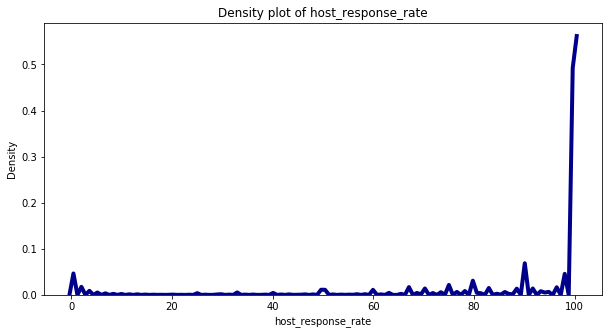

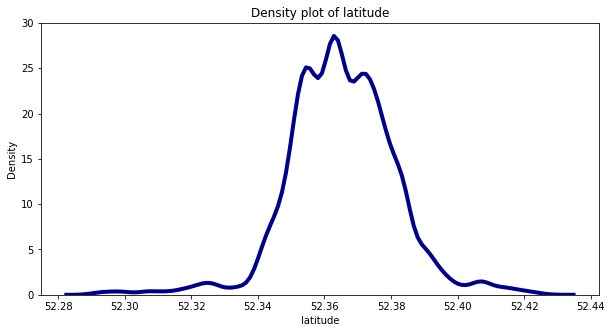

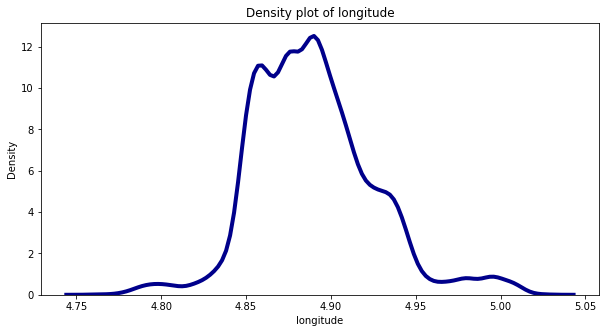

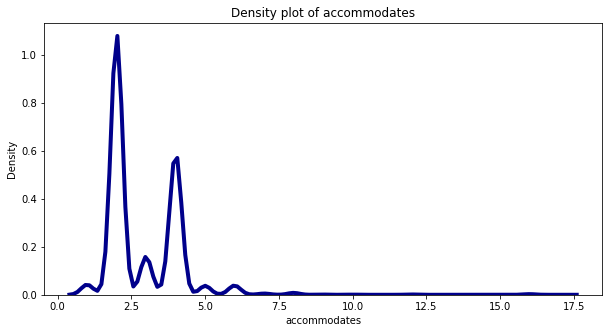

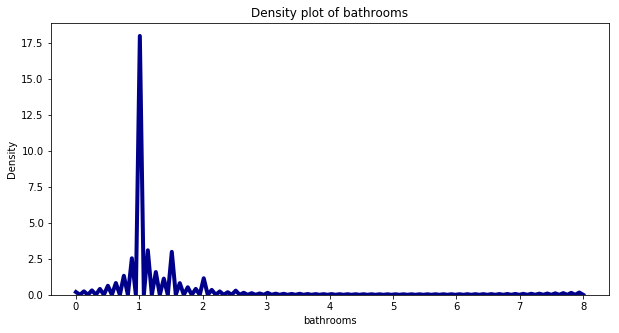

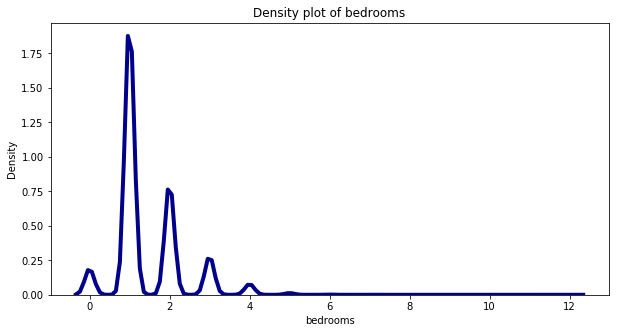

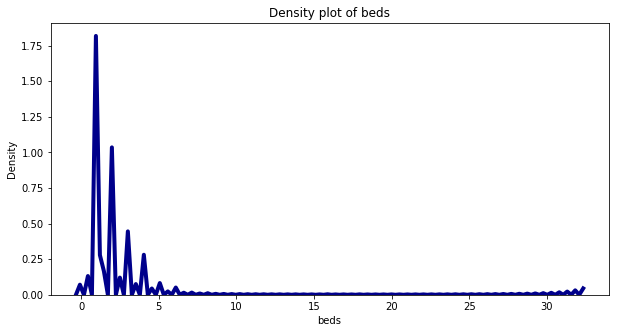

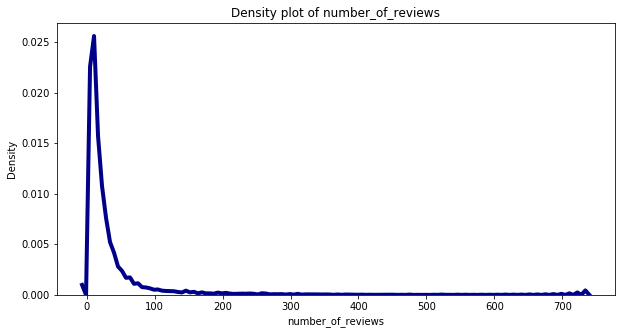

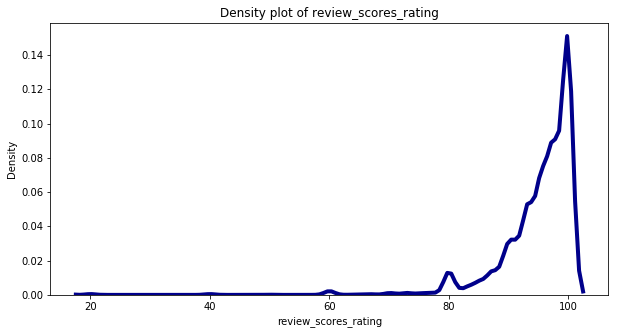

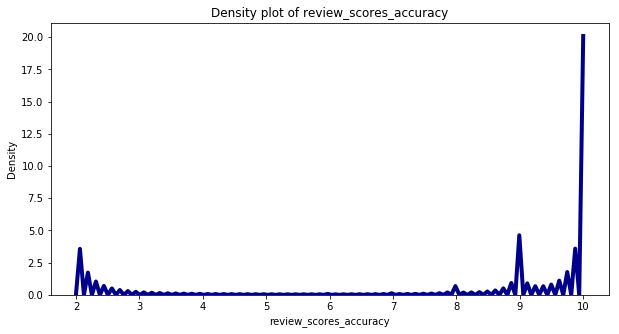

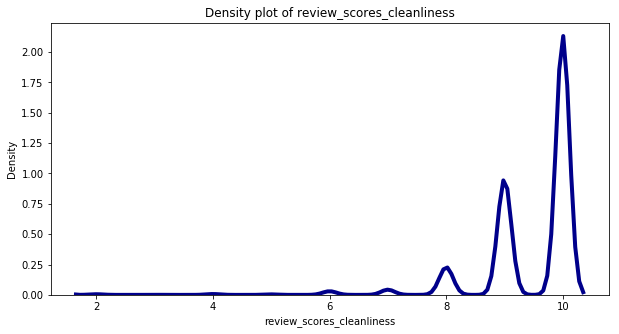

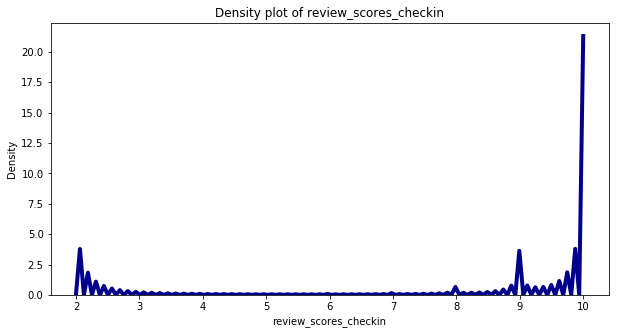

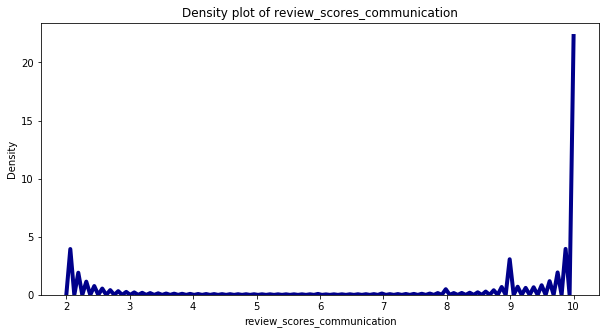

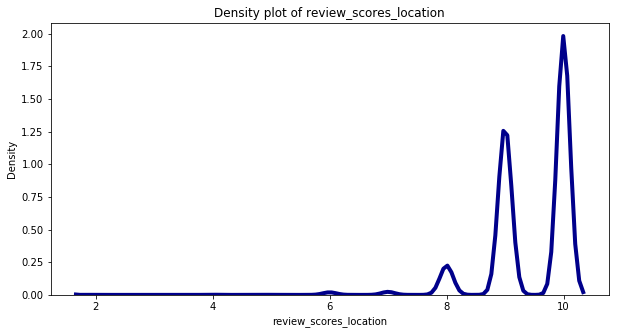

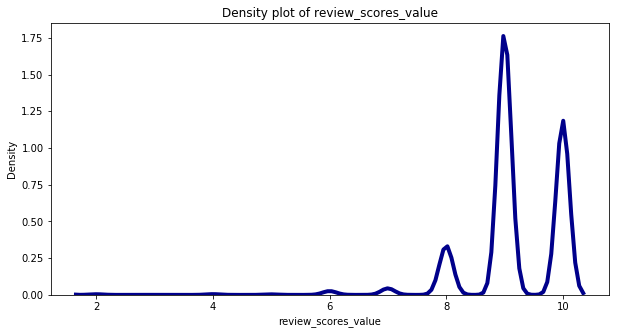

In [33]:
for my_feature in continuous_list:
    f = plt.figure(figsize=(10,5))
    sns.distplot(X_train[my_feature], kde=True, hist=False, 
    color = 'darkblue', 
    kde_kws={'linewidth': 4}).set_title("Density plot of {}".format(my_feature)); 
    plt.ylabel('Density')

From the above plots we cannot determine anything about removing any features.

#### Plot of the categorical distributions

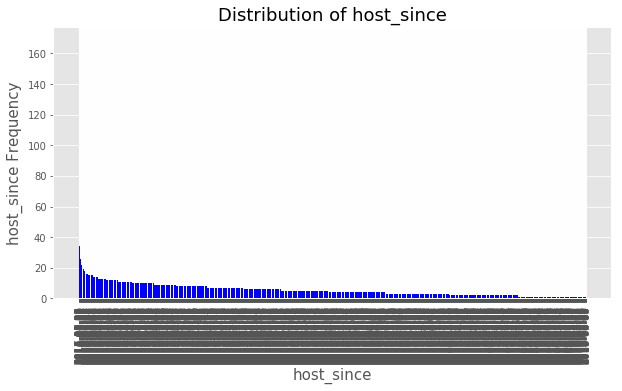

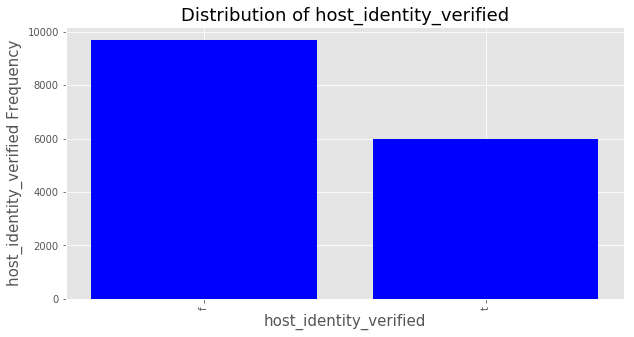

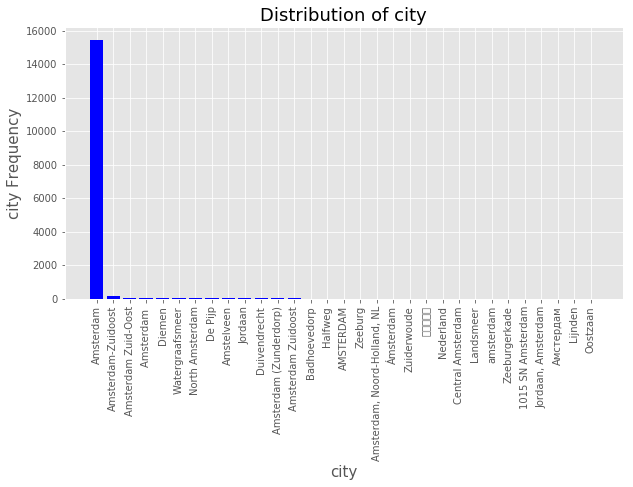

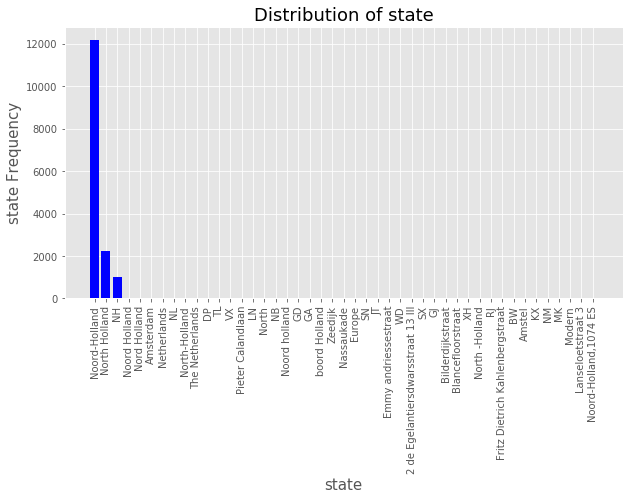

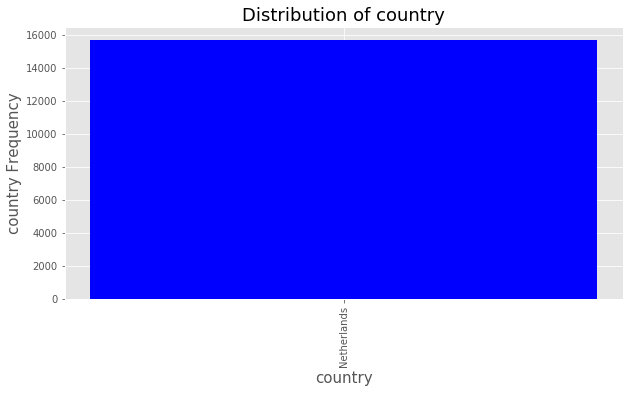

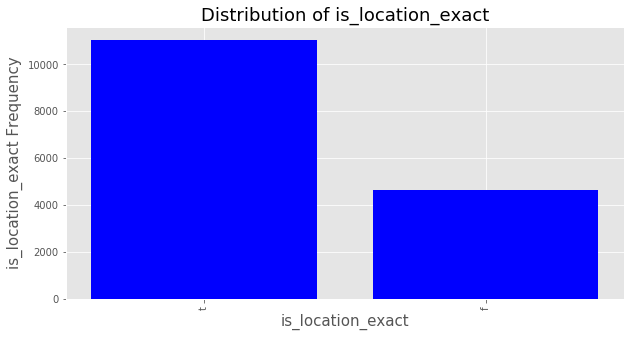

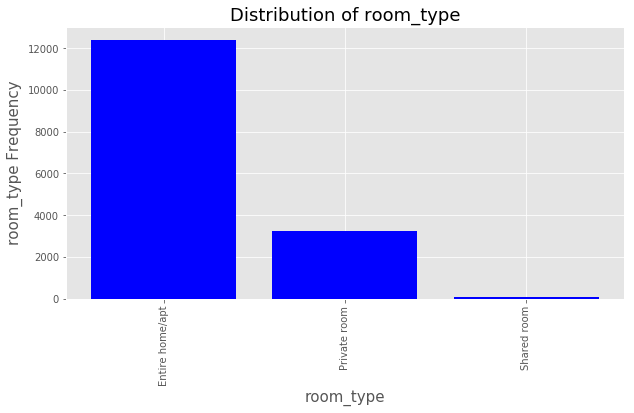

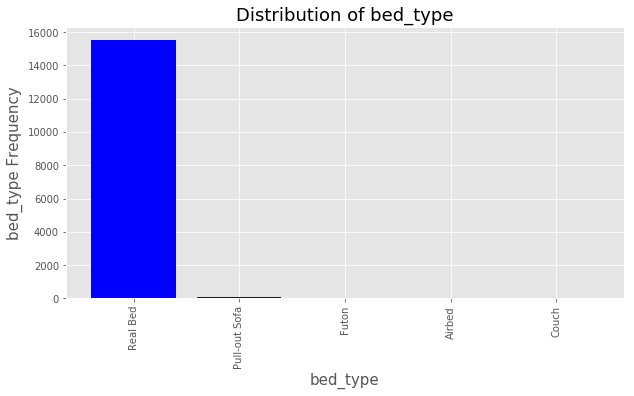

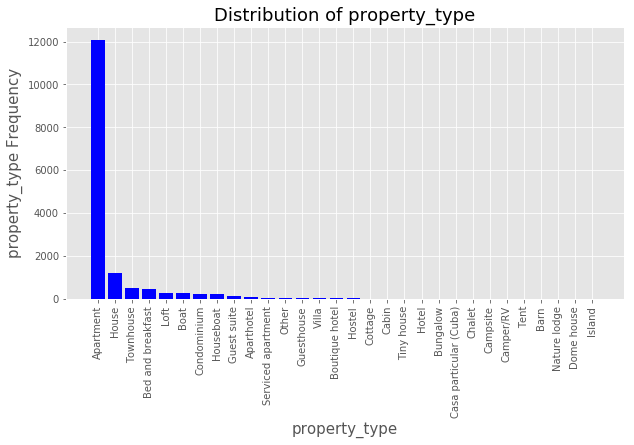

In [34]:
for my_feature in categoric_list:
    f=plt.figure(figsize=(10,5))
    plt.style.use('ggplot')
    my_dist= X_train[my_feature].value_counts()
    x = my_dist.index
    my_counts = my_dist.values
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x_pos, my_counts, color='blue')
    plt.xlabel(my_feature,fontsize = 15)
    plt.ylabel("{} Frequency".format(my_feature), fontsize = 15)
    plt.title("Distribution of {}".format(my_feature),fontsize = 18)
    plt.xticks(x_pos, x, rotation='vertical')
    plt.show()

Just by looking at the above distribution plots it is evident that the following features must be removed:
city, country, bed_type. Normally, city and country would be correlated to the price as common knowledge dictates, but in this case the data are not evenly distributed beyond 1 value, enough to be able to use these features.
The majority of their distribution is the same value. So this makes these features obsolete. They have no predicitve power since most of them have the same values. There is no meaningful distinction that can be makde for the prediction. Lastly, state has an extremely long tail so it is not a good feature to keep. We will also drop state.

#### Remove the above features mentioned

In [35]:
categoric_list.remove('city')
categoric_list.remove('country')
categoric_list.remove('bed_type')
categoric_list.remove('state')
categoric_list

['host_since',
 'host_identity_verified',
 'is_location_exact',
 'room_type',
 'property_type']

In [36]:
X_train = X_train.drop(['city','country','bed_type','state'], axis = 1)
X_train.columns

Index(['host_since', 'host_response_rate', 'host_identity_verified',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

### Relationship between remaining features

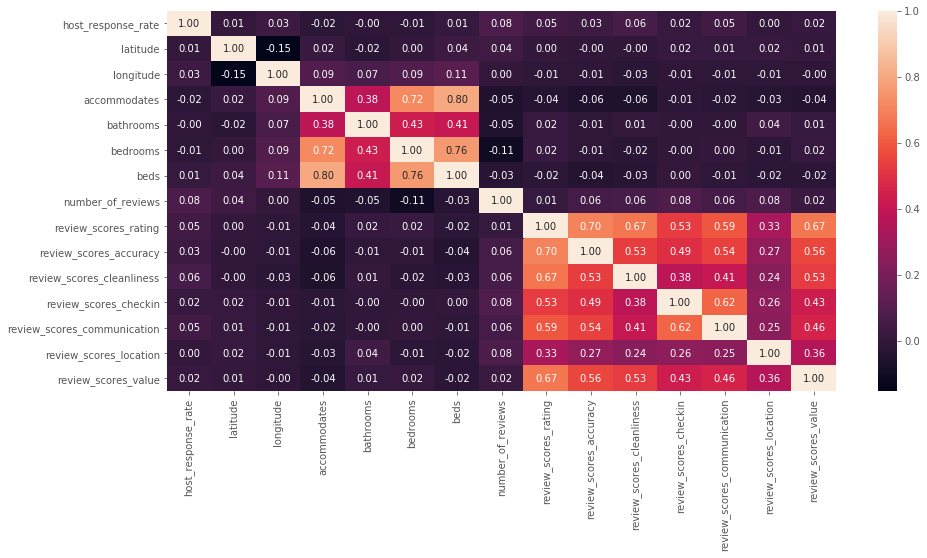

In [37]:
f = plt.figure(figsize=(15,7))
ax = sns.heatmap(X_train.corr(), annot=True, fmt=".2f")

From the above Heat Map, we can see that accommodates and beds are very highly correlated at 0.8, beds and bedrooms also at 0.76, and bedrooms and accommodates at 0.72. This makes sense because they are all redundant. Only the feature with the highest correlation with the price, that will be determined below, should be kept.

### Relationship between categorical and numerical features:

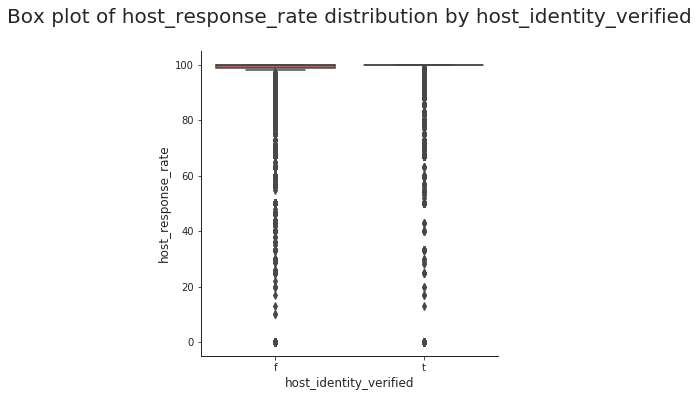

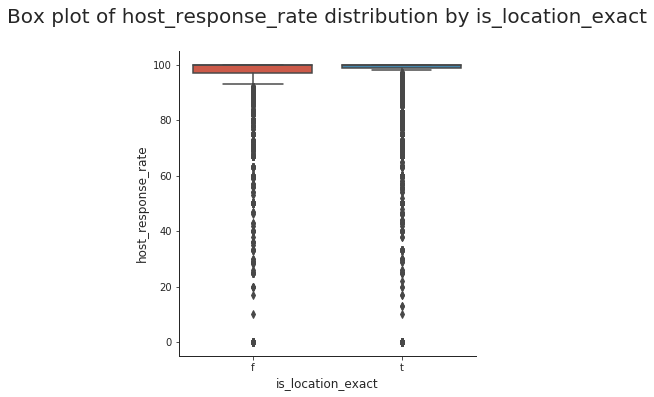

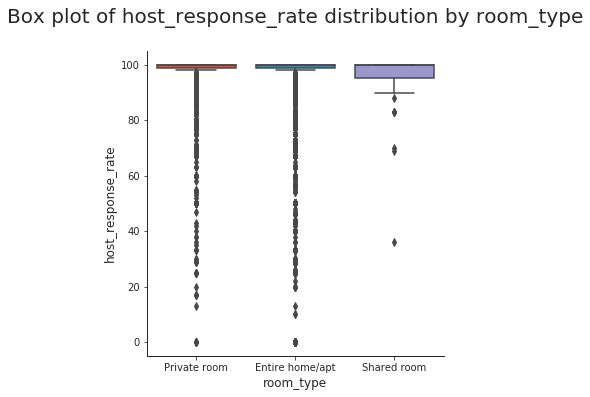

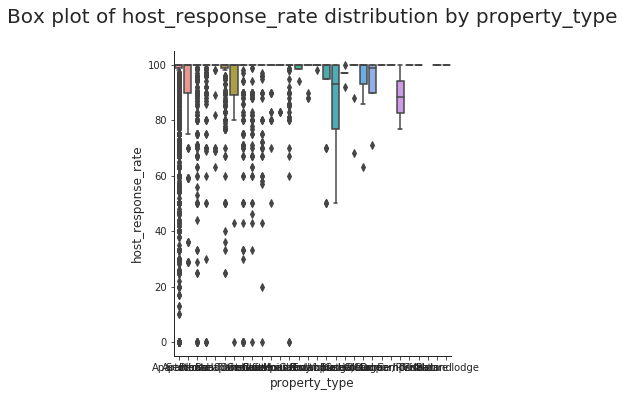

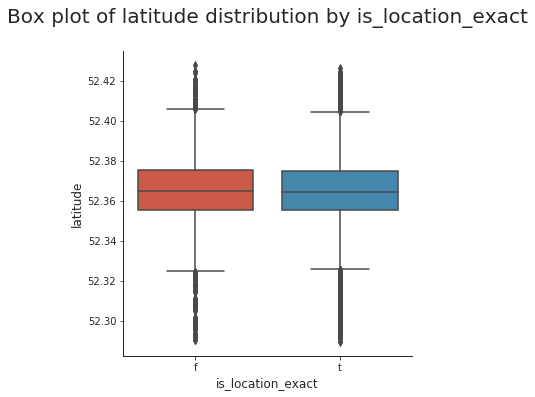

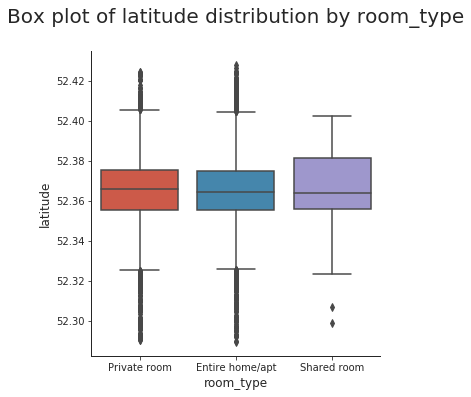

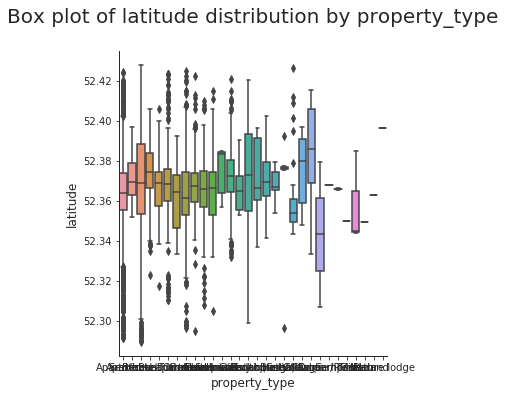

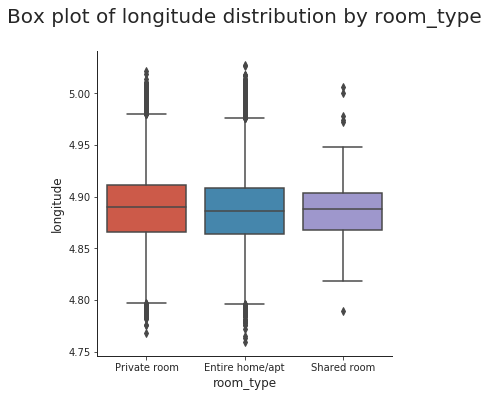

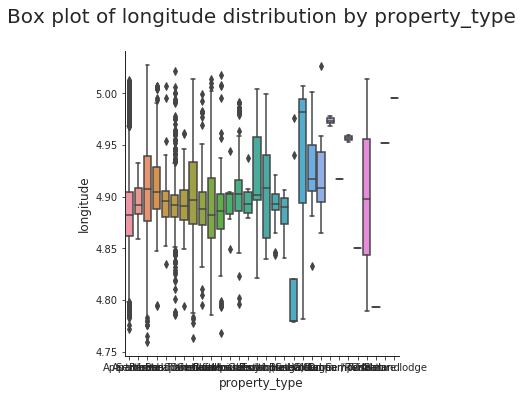

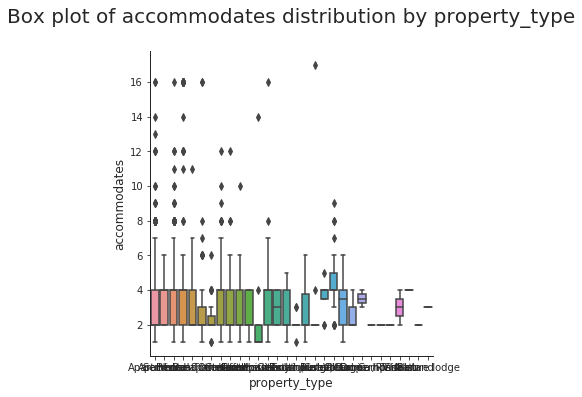

In [38]:
for my_index,my_feature in enumerate(continuous_list):
    for my_feature2 in categoric_list[my_index+1::]:
        with sns.axes_style(style='ticks'):
            g = sns.catplot(my_feature2, my_feature, data=X_train, kind="box")
            g.set_axis_labels(my_feature2,my_feature)
            plt.title('Box plot of {} distribution by {}\n'.format(my_feature,my_feature2), \
            fontdict = {'size':20});

### Relations of all of the Features with the Dependent Variable

#### Continuous distributions with the dependant variable

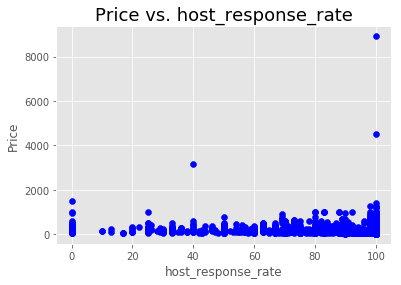

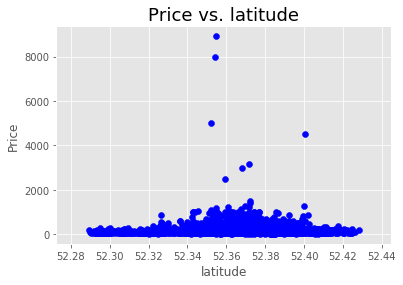

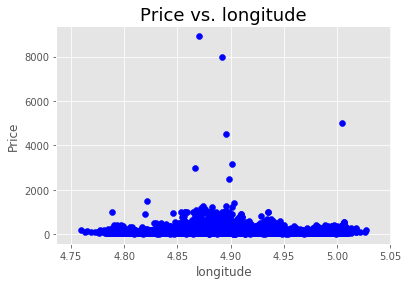

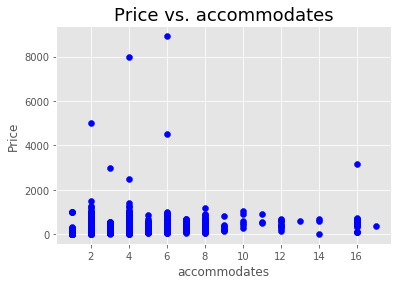

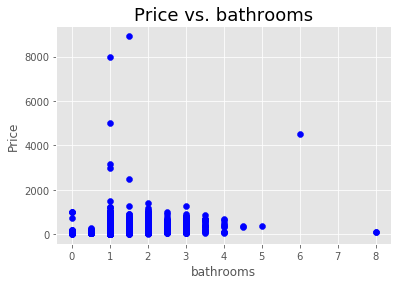

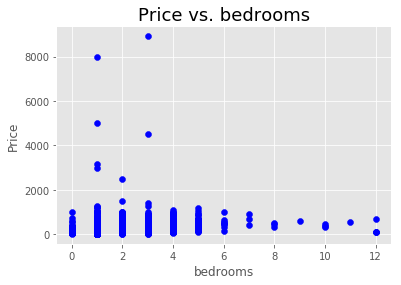

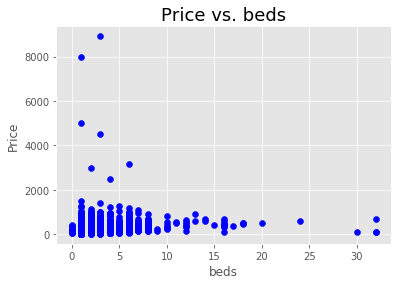

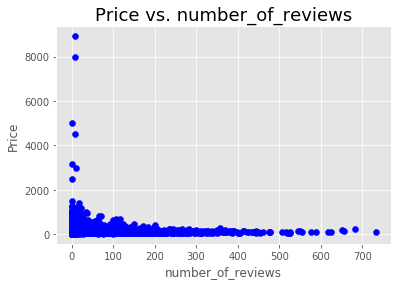

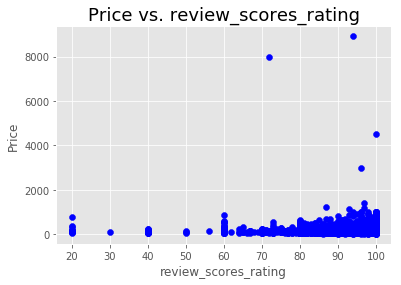

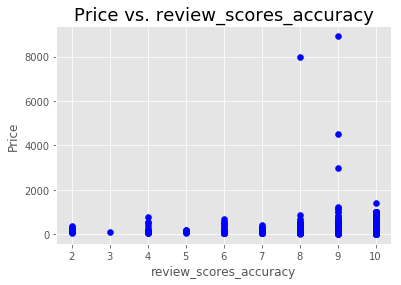

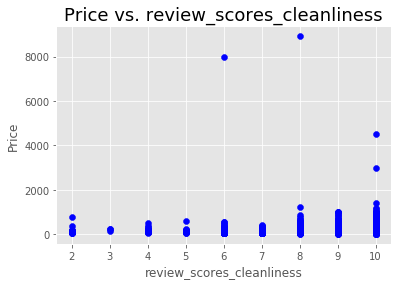

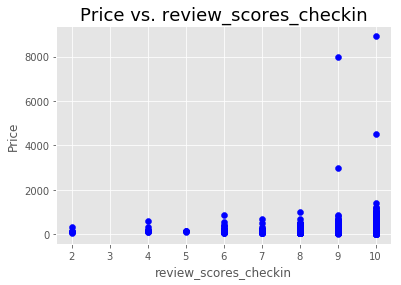

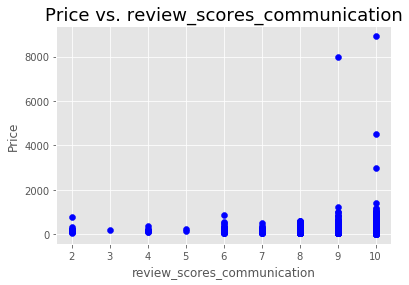

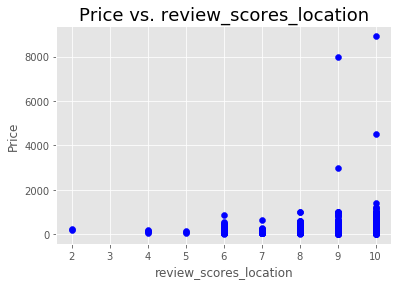

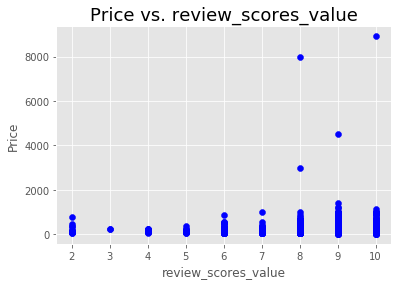

In [39]:
for my_feature in continuous_list:
    f = plt.figure()
    plt.scatter(X_train[my_feature], y_train, color='blue');
    plt.ylabel('Price');
    plt.xlabel(my_feature);
    plt.title("Price vs. {}".format(my_feature),fontsize = 18);

From the above scatter plots we can conclude that latitude and longitude are not correlated to price. These must be removed from the features

In [40]:
continuous_list.remove('longitude')
continuous_list.remove('latitude')
continuous_list

['host_response_rate',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [41]:
X_train = X_train.drop(['longitude','latitude'], axis = 1)
X_train.columns

Index(['host_since', 'host_response_rate', 'host_identity_verified',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

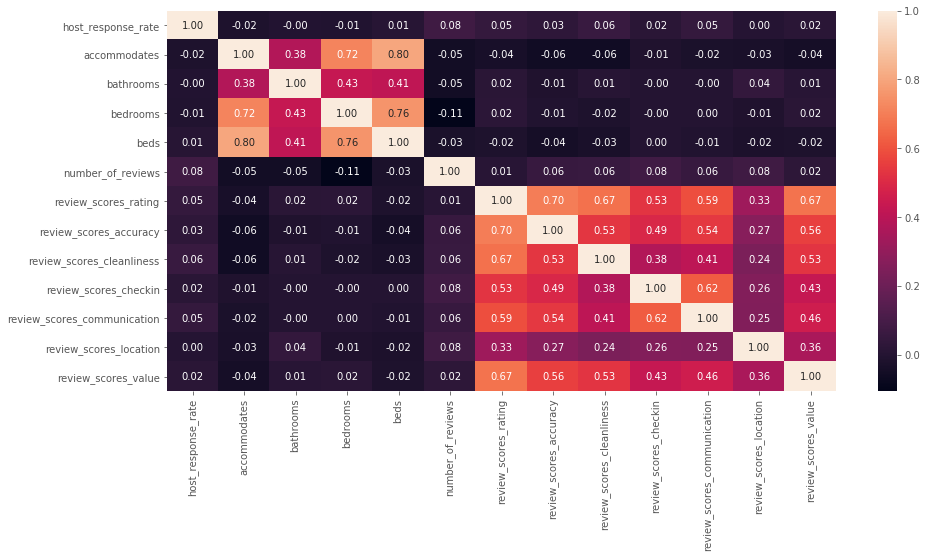

In [42]:
f = plt.figure(figsize=(15,7))
ax = sns.heatmap(X_train.corr(), annot=True, fmt=".2f")

In [43]:
x_temp = X_train[['beds','bedrooms','accommodates']].copy()
x_temp.head()

,beds,bedrooms,accommodates
12384,2.0,1.0,3
14872,3.0,3.0,4
3245,2.0,2.0,3
17907,2.0,3.0,4
18920,3.0,1.0,4


In [44]:
x_temp['price'] = y_train
x_temp.head()

,beds,bedrooms,accommodates,price
12384,2.0,1.0,3,95.0
14872,3.0,3.0,4,285.0
3245,2.0,2.0,3,150.0
17907,2.0,3.0,4,80.0
18920,3.0,1.0,4,275.0


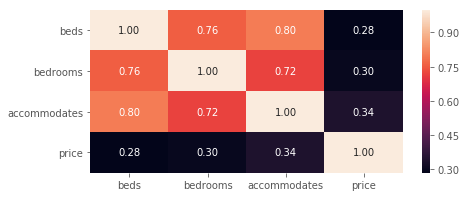

In [45]:
f = plt.figure(figsize=(7,3))
ax = sns.heatmap(x_temp.corr(), annot=True, fmt=".2f")

From the above Heat map and the scatter plots further up, we can conclude that accommodates has the highest correlation to price and that bedrooms and beds should be dropped.

In [46]:
continuous_list.remove('bedrooms')
continuous_list.remove('beds')
continuous_list

['host_response_rate',
 'accommodates',
 'bathrooms',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [47]:
X_train = X_train.drop(['bedrooms','beds'], axis = 1)
X_train.columns

Index(['host_since', 'host_response_rate', 'host_identity_verified',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

#### Categorical distributions with the dependant variable

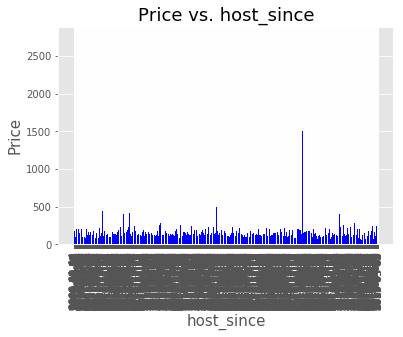

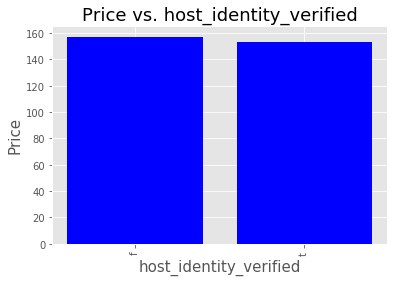

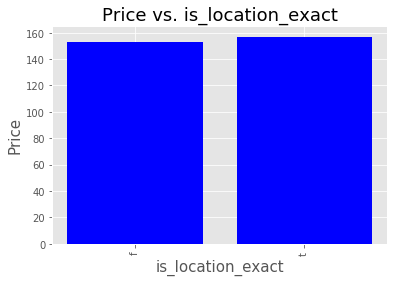

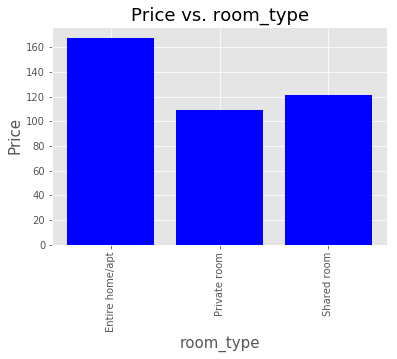

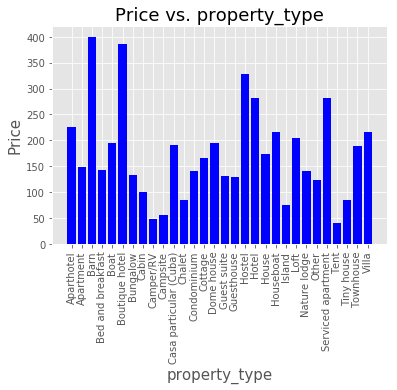

In [48]:
for my_feature in categoric_list:  
    x_temp = X_train[[my_feature]].copy()
    x_temp['price'] = y_train 
    plt.style.use('ggplot')
    my_dist= x_temp.groupby(my_feature).mean()
    x = my_dist.index.values
    my_counts = my_dist['price']
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x_pos, my_counts, color='blue')
    plt.xlabel(my_feature,fontsize = 15)
    plt.ylabel("Price", fontsize = 15)
    plt.title("Price vs. {}".format(my_feature),fontsize = 18)
    plt.xticks(x_pos, x,rotation='vertical')
    plt.show()

From the above bar plots, it seems safe to conclude that host_since, host_identity_verified and is_location_exact does not have any sort of significant impact on price. The average price for each seems equally distributed. However, host_since is a date. With some proper feature extraction, this can be turned into an ordinal variable that calculated the time elapsed since the host started hosting. This is a very different measurement from the categorical one above. For the purpose of this project I will simply drop them.

In [49]:
categoric_list.remove('host_since')
categoric_list.remove('host_identity_verified')
categoric_list.remove('is_location_exact')
categoric_list

['room_type', 'property_type']

In [50]:
X_train = X_train.drop(['host_since','host_identity_verified','is_location_exact'], axis = 1)
X_train.columns

Index(['host_response_rate', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

## Part II:
   
**On your train set alone**
 
 1. Transform your categorical features - explain what your considerations were in ragards to which method you chose.
 2. What is the data shape after the transformation? 
 3. Look at the distribution of all the new features that were added / transformed by you - What can we say about it? Can you spot any redundant features (features with very low cardinality or super un-even distribution, long tail)? Show it.
 4. Take care of the features you mentioned in q7, and explain your steps.
 
**On your test set**
 5. Transform the categorical features in the test set, according to the train set. Make sure the test set now has no more and  no less features than the train set, and that they match in name.

### 1 - Transform categorical features:

In [51]:
X_train[categoric_list].head()

,room_type,property_type
12384,Private room,Apartment
14872,Entire home/apt,Apartment
3245,Entire home/apt,Apartment
17907,Entire home/apt,Apartment
18920,Entire home/apt,Aparthotel


In the above remaining categoric features:
- state has no order so we use one-hot encoding
- room_type can be converted to an ordinal variable since we know according to common knowledge, that and entire home is more expensive than a private room which is more expensive than a shared room.
- property_type also follows a certain order, but it us too difficult with my current knowledge to rank them in order. So for now I will one-hot encode them.

In [52]:
X_train['property_type'].value_counts()

Apartment                 12075
House                      1209
Townhouse                   503
Bed and breakfast           438
Loft                        296
Boat                        265
Condominium                 236
Houseboat                   209
Guest suite                 110
Aparthotel                   95
Serviced apartment           47
Other                        35
Guesthouse                   33
Villa                        32
Boutique hotel               30
Hostel                       18
Cottage                      10
Cabin                        10
Tiny house                    9
Hotel                         9
Bungalow                      8
Casa particular (Cuba)        6
Chalet                        3
Campsite                      2
Camper/RV                     2
Tent                          1
Barn                          1
Nature lodge                  1
Dome house                    1
Island                        1
Name: property_type, dtype: int64

In [53]:
X_train['room_type'].value_counts()

Entire home/apt    12410
Private room        3225
Shared room           60
Name: room_type, dtype: int64

In [54]:
size_dict = {'Shared room':1, 'Private room':2, 'Entire home/apt':3}
X_train['room_type'] = X_train['room_type'].apply(lambda x: size_dict[x])

In [55]:
X_train['room_type'].value_counts()

3    12410
2     3225
1       60
Name: room_type, dtype: int64

In [56]:
X_train = pd.get_dummies(X_train, columns=['property_type'], prefix='p_type')

### 2 - Shape of Data

In [57]:
X_train.shape

(15695, 42)

In [58]:
X_train.columns

Index(['host_response_rate', 'room_type', 'accommodates', 'bathrooms',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'p_type_Aparthotel', 'p_type_Apartment',
       'p_type_Barn', 'p_type_Bed and breakfast', 'p_type_Boat',
       'p_type_Boutique hotel', 'p_type_Bungalow', 'p_type_Cabin',
       'p_type_Camper/RV', 'p_type_Campsite', 'p_type_Casa particular (Cuba)',
       'p_type_Chalet', 'p_type_Condominium', 'p_type_Cottage',
       'p_type_Dome house', 'p_type_Guest suite', 'p_type_Guesthouse',
       'p_type_Hostel', 'p_type_Hotel', 'p_type_House', 'p_type_Houseboat',
       'p_type_Island', 'p_type_Loft', 'p_type_Nature lodge', 'p_type_Other',
       'p_type_Serviced apartment', 'p_type_Tent', 'p_type_Tiny house',
       'p_type_Townhouse', 'p_type_Villa'],
      dtype='object')

### 3 - Distribution of new categorical features.

In [59]:
total_features = list(X_train.columns)
new_cat_features = list(set(total_features) - set(continuous_list))

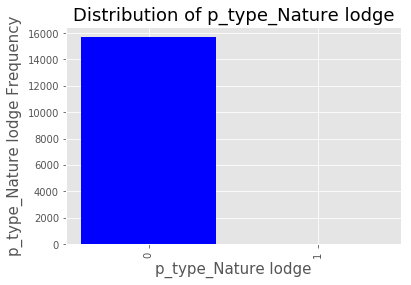

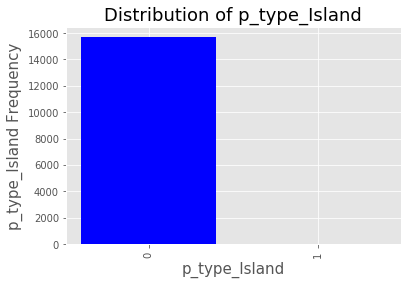

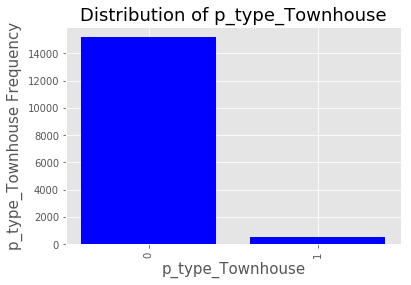

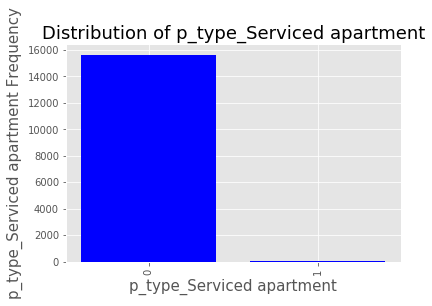

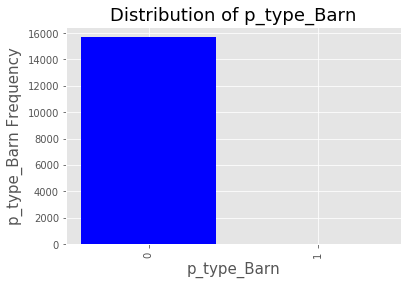

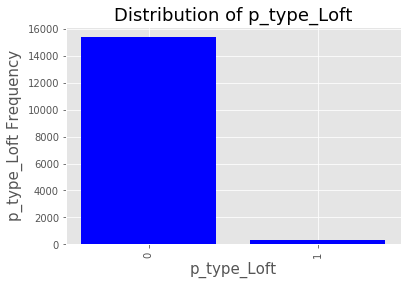

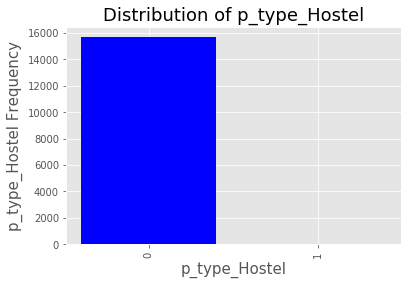

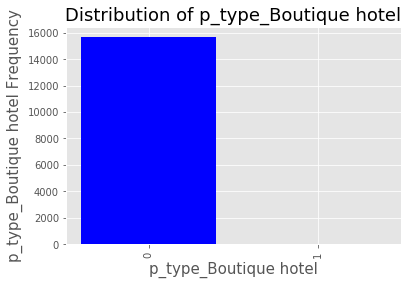

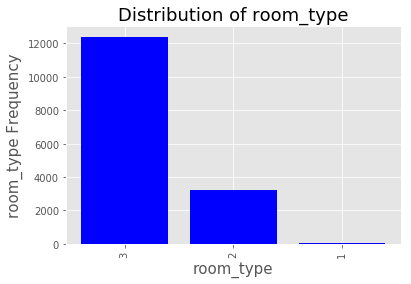

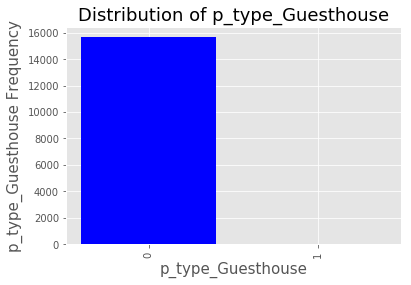

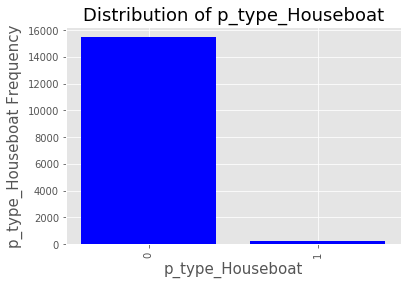

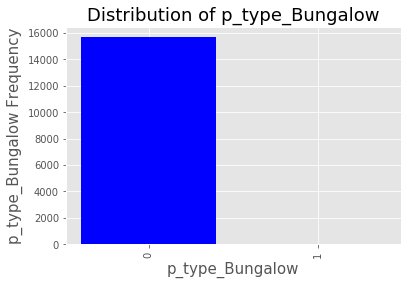

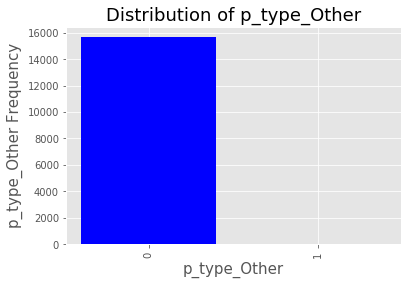

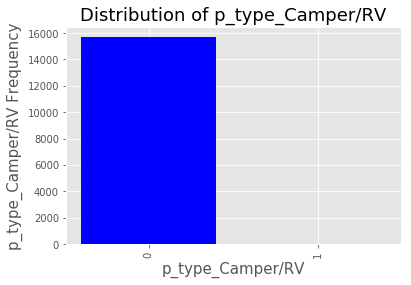

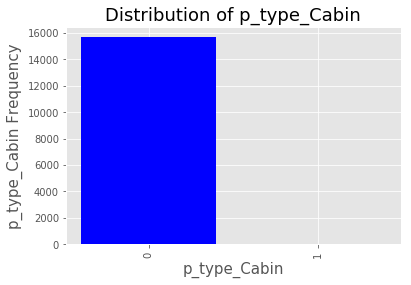

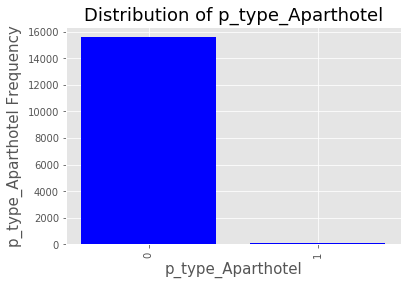

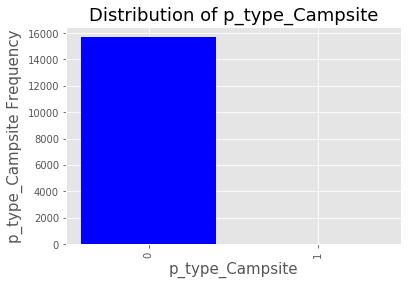

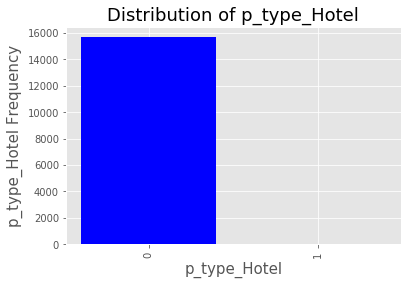

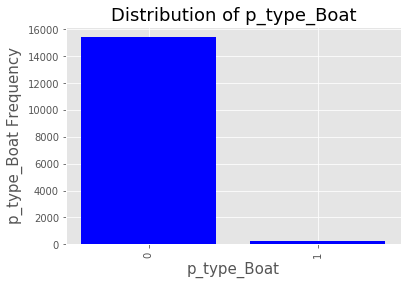

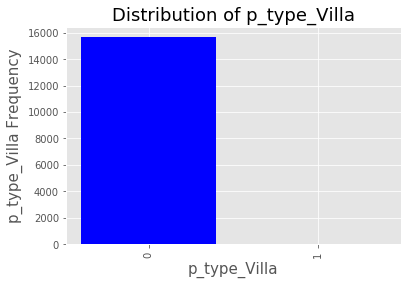

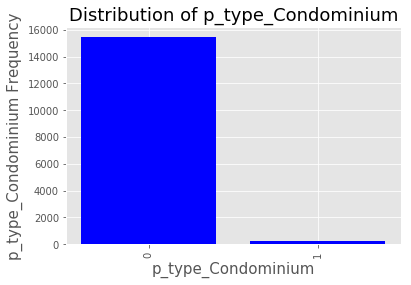

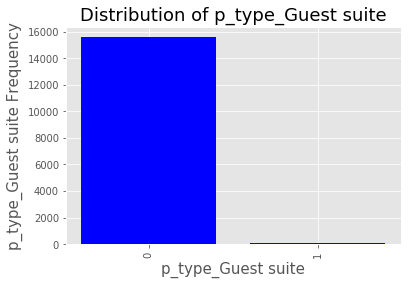

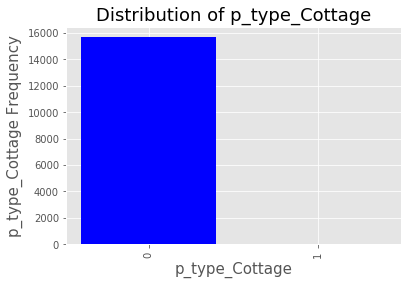

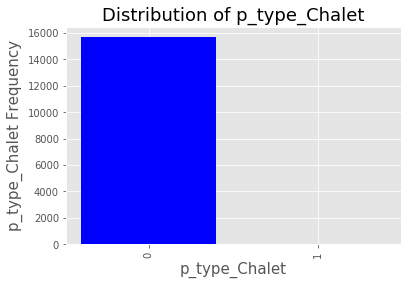

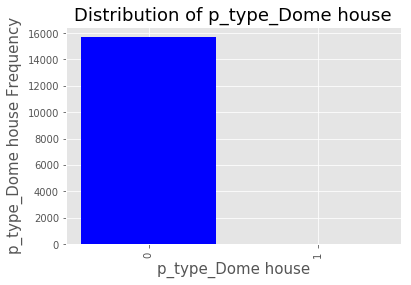

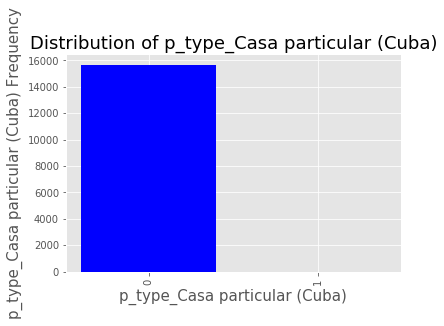

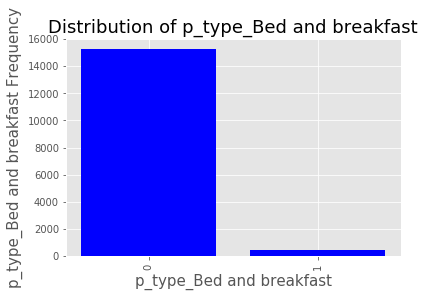

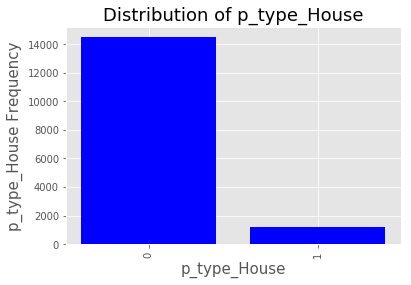

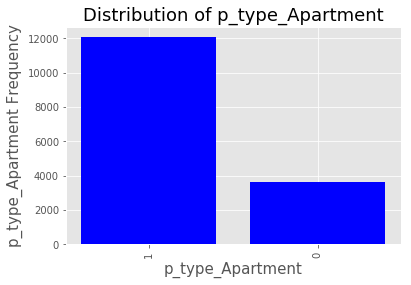

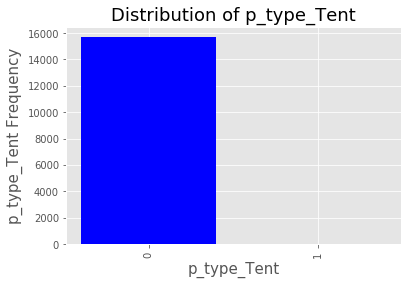

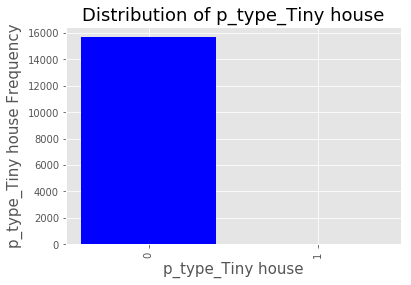

In [60]:
for my_feature in new_cat_features:
    plt.style.use('ggplot')
    my_dist= X_train[my_feature].value_counts()
    x = my_dist.index
    my_counts = my_dist.values
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x_pos, my_counts, color='blue')
    plt.xlabel(my_feature,fontsize = 15)
    plt.ylabel("{} Frequency".format(my_feature), fontsize = 15)
    plt.title("Distribution of {}".format(my_feature),fontsize = 18)
    plt.xticks(x_pos, x, rotation='vertical')
    plt.show()

We see from the above tables, many lopsided distributions, meaning that they have no predictive power. All these columns have mainly 1 category. A quick look will tell us that many more of the columns will be removed than we will keep. So the following are the comlumns we want to keep:
room_type, p_type_House, p_type_Apartment.

This makes sense because House and Apartment are the most common property types.


### 4 - Drop all the features mentioned above

#### Creat list of columns to keep

In [61]:
keep_list = ['room_type', 'p_type_House', 'p_type_Apartment']

#### List of columns to drop by subtracting all the continuous values and the list of columsnt o keep from all the columns

In [62]:
drop_list = list(set(X_train.columns) - set(continuous_list) - set(keep_list))

#### drop all the columns in drop_list

In [63]:
X_train = X_train.drop(drop_list, axis = 1)

#### Check that all the drops were done succesfully

In [64]:
X_train.columns

Index(['host_response_rate', 'room_type', 'accommodates', 'bathrooms',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'p_type_Apartment', 'p_type_House'],
      dtype='object')

### 5 - Applying all modifications to the test set:

#### Drop appropriate columns

In [65]:
remove_columns = ['square_feet', 'listing_url','name','summary','space','host_id','host_name','amenities',
                  'city','country','bed_type','longitude','latitude','bedrooms','beds','host_since',
                  'host_identity_verified','is_location_exact','state'] 
X_test = X_test.drop(remove_columns, axis = 1)

#### Transform categorical variables

In [66]:
size_dict = {'Shared room':1, 'Private room':2, 'Entire home/apt':3}
X_test['room_type'] = X_test['room_type'].apply(lambda x: size_dict[x])

In [67]:
X_test = pd.get_dummies(X_test, columns=['property_type'], prefix='p_type')

#### Adjust the columns in the test set

In [68]:
test_cols_to_delete = set(X_test.columns) - set(X_train.columns)

In [69]:
train_cols_to_add_to_test = set(X_train.columns) - set(X_test.columns)

In [70]:
X_test.drop(list(test_cols_to_delete), axis = 1, inplace = True)

In [71]:
X_test[list(train_cols_to_add_to_test)] = pd.DataFrame([[0] * len(list(train_cols_to_add_to_test))], index=df.index)

In [72]:
assert(set(X_train.columns)==set(X_test.columns))

In [73]:
assert( X_train.shape[1]== X_test.shape[1])

## Part III:

**On your train set alone**

 1. Transform your continuous features according to the 3 methods: normalization, binning and transformations (choose different features for each method)
 2. Explain the logic behind your choice
 3. Plot the new distributions to check that your transformation worked
 
**On your test set**
 4. Transform the continuous features in the test set, according to the train set. 

### 1,2 - Transform the continuous features

#### By looking at the density plots above of the numerical data:

Binning:

host_response_rate, review_scores_accuracy, review_scores_checkin, review_scores_communication

Normalization:

accommodates, bathrooms, review_scores_cleanliness, review_scores_location, review_scores_value, room_type

Transformation: 

number_of_reviews, review_scores_rating

I chose the binning distributions because the distributions are heavily skewed to 1 or 2 values and they do not seem to have a well defined distribution.

I chose the Normalization distributions because the distributions are not smooth but demonstrate distribution trends that need smoothening. This is especially true for the ordinal feature room_type.

I chose the Transformation distributions because the distributions are well defined but very tight and skewed distributions which need to be in a more normal distribution


In [74]:
X_train.columns

Index(['host_response_rate', 'room_type', 'accommodates', 'bathrooms',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'p_type_Apartment', 'p_type_House'],
      dtype='object')

#### Normalize the features to be Normalized

In [75]:
from sklearn.preprocessing import StandardScaler
normalization_features = ['accommodates', 'bathrooms', 'review_scores_cleanliness', 'review_scores_location',
                          'review_scores_value','room_type']
scaler = StandardScaler()
scaler.fit(X_train[normalization_features])
X_train[normalization_features] = scaler.transform(X_train[normalization_features])

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


#### Transform the features to be transformed.

In [76]:
from sklearn.preprocessing import FunctionTransformer
transformer_features = ['number_of_reviews', 'review_scores_rating']
transformer = FunctionTransformer(np.log1p, validate=False)
X_train[transformer_features] = pd.DataFrame(transformer.transform(X_train[transformer_features]))

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:201: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


#### Binning features that need binning

In [77]:
binning_features = ['host_response_rate', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_communication']
train_bins={}
for my_feature in binning_features:
    ind,train_bins[my_feature] = pd.cut(X_train[my_feature], 10, retbins = True)
    X_train[my_feature] = pd.cut(X_train[my_feature], 10)
    

I chose 10 bins because the theoretical range of all the scores except 1 is 10.

### 3 - Plots of the New transformed features:

#### Plots of the new normalized features

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


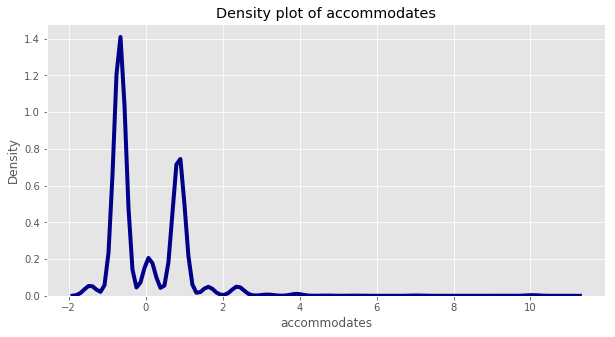

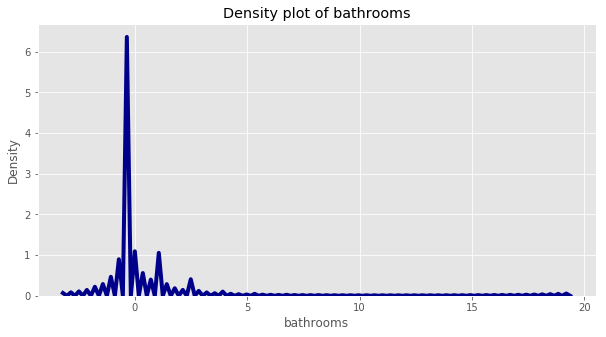

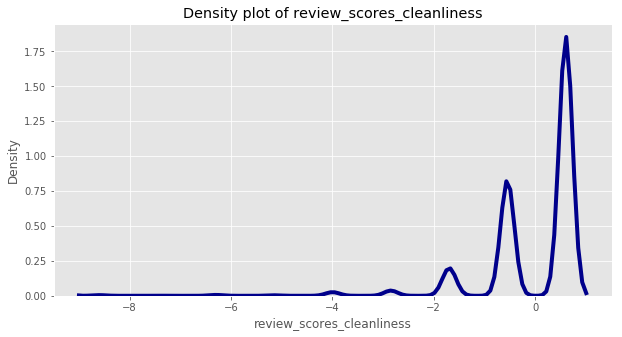

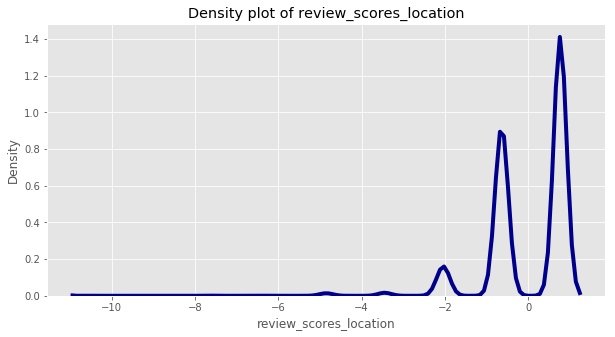

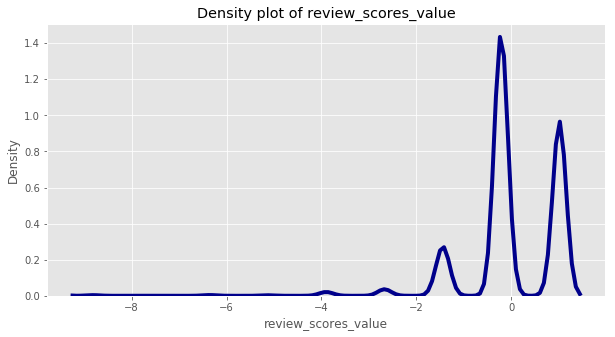

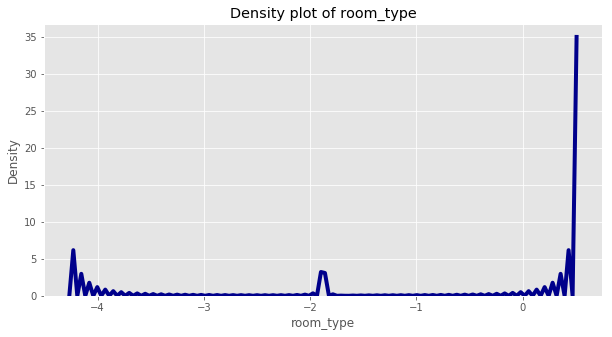

In [78]:
for my_feature in normalization_features:
    f = plt.figure(figsize=(10,5))
    sns.distplot(X_train[my_feature], kde=True, hist=False, 
    color = 'darkblue', 
    kde_kws={'linewidth': 4}).set_title("Density plot of {}".format(my_feature)); 
    plt.ylabel('Density')

#### Plots of New Log Transformed features:

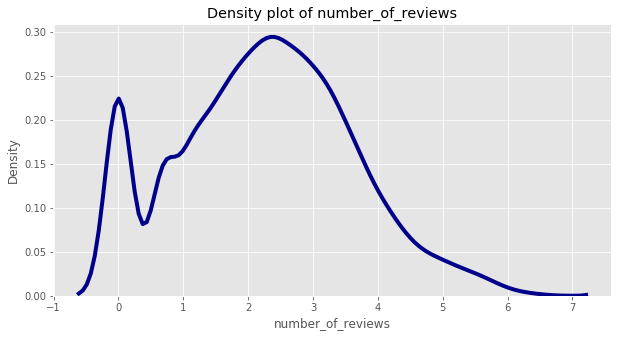

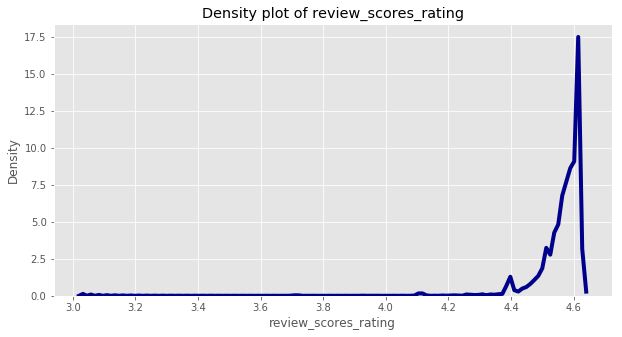

In [79]:
for my_feature in transformer_features:
    f = plt.figure(figsize=(10,5))
    sns.distplot(X_train[my_feature], kde=True, hist=False, 
    color = 'darkblue', 
    kde_kws={'linewidth': 4}).set_title("Density plot of {}".format(my_feature)); 
    plt.ylabel('Density')

#### Plots of new binning features

<Figure size 432x288 with 0 Axes>

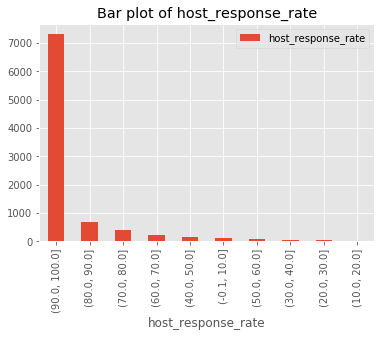

<Figure size 432x288 with 0 Axes>

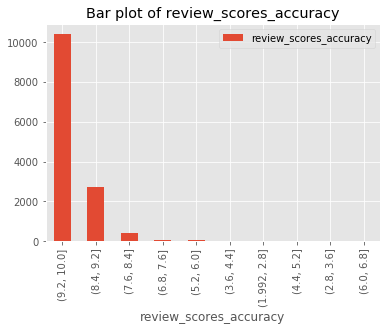

<Figure size 432x288 with 0 Axes>

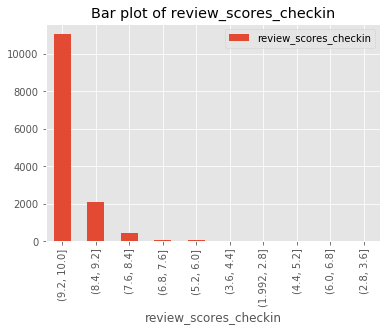

<Figure size 432x288 with 0 Axes>

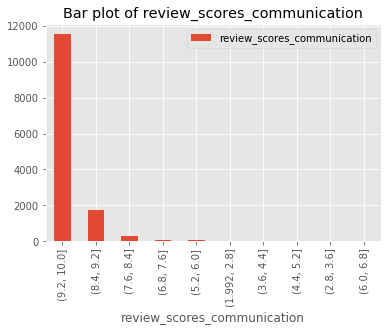

In [80]:
for my_feature in binning_features:
    f = plt.figure();
    pd.DataFrame(X_train[my_feature].value_counts()).plot(kind='bar');
    plt.title('Bar plot of {}'.format(my_feature))
    plt.xlabel(my_feature)
    plt.show()

As seen in the plots above, all the transformations were done successfully.

### 4 - Transform the continuous features in the test set according to the train set

#### Normalize the test set features according to training set

Here we assume that the Train set and Test set have the same distribution

In [81]:
X_test[normalization_features] = scaler.transform(X_test[normalization_features])

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#### Transform the test set features according to the training set

In [82]:
X_test[transformer_features] = pd.DataFrame(transformer.transform(X_test[transformer_features]))

#### Binning the test set features according to the trainign set

In [83]:
for my_feature in binning_features:
     X_test[my_feature] = pd.cut(X_test[my_feature], bins = train_bins[my_feature])

<div class="alert alert-info"><b>NOTE:</b> You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable.</div>